In [1]:
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import pandas.io.sql as sql
import pandas as pd
import numpy as np
import matplotlib
import pymysql

In [2]:
%matplotlib inline
matplotlib.style.use('ggplot')

In [82]:
conn=pymysql.connect(user='root',password='siyi01',database='dzdp',charset='utf8')

In [83]:
data=sql.read_sql('select a.shop_id,a.shop,b.area,a.addr,a.category,a.review_num,a.mean_price,a.taste,a.env,a.serve\
 from food_shanghai a inner join foodurl_shanghai b on a.url_id=b.url_id',conn)

In [ ]:
conn.close()

In [5]:
data.columns

Index(['shop_id', 'shop', 'area', 'addr', 'category', 'review_num',
       'mean_price', 'taste', 'env', 'serve'],
      dtype='object')

In [85]:
data.replace(0,np.nan,inplace=True)

In [86]:
hot_shops=data.ix[data[['review_num','mean_price','taste','env','serve']].dropna().index]
cool_shops=data.ix[data.index.difference(hot_shops.index)]

In [111]:
len(data),len(hot_shops),len(cool_shops)

(136682, 61633, 75049)

In [10]:
len(np.unique(data.category))  #分类

28

In [15]:
np.unique(data.category)

array(['东北菜', '东南亚菜', '云南菜', '其他', '台湾菜', '咖啡厅', '小吃快餐', '川菜', '新疆菜',
       '日本菜', '本帮江浙菜', '江西菜', '海鲜', '清真菜', '湘菜', '火锅', '烧烤', '粤菜', '素菜',
       '自助餐', '茶馆', '蟹宴', '西北菜', '西餐', '贵州菜', '酒吧', '面包甜点', '韩国料理'], dtype=object)

In [88]:
len(np.unique(data.area))  #地区

17

In [16]:
np.unique(data.area)

array(['卢湾区', '嘉定区', '奉贤区', '宝山区', '崇明县', '徐汇区', '普陀区', '杨浦区', '松江区',
       '浦东新区', '虹口区', '金山区', '长宁区', '闵行区', '闸北区', '青浦区', '静安区', '黄浦区'], dtype=object)

In [ ]:
#不用说,先来一波排名:

In [17]:
#人均最高的餐厅:
max_mean_price=data[data.mean_price==max(data.mean_price)]
max_mean_price

,shop_id,shop,area,addr,category,review_num,mean_price,taste,env,serve
105011,19523,交通学校食堂,宝山区,呼兰路交通学校内,小吃快餐,32.0,48358.0,7.3,6.9,7.0


In [87]:
#噢,No...水军太多...把这个剔除掉
data.drop(105011,inplace=True)
hot_shops.drop(105011,inplace=True)

In [24]:
max_mean_price=data[data.mean_price==max(data.mean_price)]
max_mean_price
#不愧是海参天堂,也是消费天堂

,shop_id,shop,area,addr,category,review_num,mean_price,taste,env,serve
5094,94690,福海海参堂,徐汇区,南丹路183-3号,其他,12.0,6820.0,7.2,7.2,7.4


In [29]:
#最火的餐厅(按评论数最多记)...注意到了吗,是川菜~
max_review_num=data[data.review_num==max(data.review_num)]
max_review_num

,shop_id,shop,area,addr,category,review_num,mean_price,taste,env,serve
71908,116711,辛香汇(西藏中路店),黄浦区,金陵东路500号亚龙国际广场4楼,川菜,37676.0,72.0,7.5,6.7,6.5


In [30]:
#味道最好的餐厅
best_taste=data[data.taste==max(data.taste)]
best_taste

,shop_id,shop,area,addr,category,review_num,mean_price,taste,env,serve
6660,135548,黄记阳澄湖大闸蟹专卖店,徐汇区,乌鲁木齐中路308号,蟹宴,269.0,121.0,9.4,9.0,9.4


In [31]:
#一大波福利~
top_taste=data[(data.taste==9.4) | (data.taste==9.3)]
top_taste
#3家火锅..看来火锅在哪里都能撑起一片天啊

,shop_id,shop,area,addr,category,review_num,mean_price,taste,env,serve
6660,135548,黄记阳澄湖大闸蟹专卖店,徐汇区,乌鲁木齐中路308号,蟹宴,269.0,121.0,9.4,9.0,9.4
13070,112374,蟹的岡田屋(光启城店),徐汇区,宜山路455号光启城购物中心4楼,日本菜,234.0,446.0,9.3,9.2,9.2
15605,115521,贰千金私房甜品(静安店),静安区,万航渡路238弄1号,面包甜点,77.0,27.0,9.3,9.2,9.3
17947,113421,西郊壹号•南苑铁板烧,长宁区,虹桥路1950号,日本菜,372.0,1288.0,9.3,9.4,9.2
18877,45999,季悦火锅(虹桥迎宾馆店),长宁区,虹桥路1591号虹桥迎宾馆内6号楼2楼,火锅,376.0,1098.0,9.3,9.3,9.3
20478,11330,一品蝦·热气羊肉羊蝎子小海鲜,长宁区,玉屏南路539号,火锅,114.0,115.0,9.3,9.1,9.3
26938,3605,D.BAR(世界精酿啤酒坊),闵行区,银亭路66号1楼,其他,194.0,100.0,9.3,9.2,9.3
45567,128813,颐品居,浦东新区,昌里东路38号,火锅,91.0,83.0,9.3,9.1,9.3
49435,33382,名羊天下碳烤羊腿(牟平路创意店),浦东新区,牟平路143号,烧烤,231.0,95.0,9.3,9.3,9.4
124723,132314,鱼鲜馆农家菜(河鲜馆三店),青浦区,朱家角漕河街196号,本帮江浙菜,173.0,59.0,9.3,9.3,9.4


In [112]:
#环境最好的餐厅...这个黄埔区和长宁区是约会圣地么?
best_env=data[data.env==max(data.env)]
best_env

,shop_id,shop,area,addr,category,review_num,mean_price,taste,env,serve
1049,46001,季悦餐饮(锦江店),黄浦区,茂名南路59号【锦江食街】,火锅,277.0,658.0,9.2,9.4,9.4
1136,6462,LUNETTE BY AMANDA(淮海路店),黄浦区,复兴中路532号靠近思南路,西餐,196.0,435.0,9.2,9.4,9.3
17707,113419,西郊壹号,长宁区,虹桥路1950号,本帮江浙菜,394.0,588.0,9.2,9.4,9.2
17947,113421,西郊壹号•南苑铁板烧,长宁区,虹桥路1950号,日本菜,372.0,1288.0,9.3,9.4,9.2
23119,1672,ANTHOLOGIA地球美食剧场,长宁区,番禺路381号D栋105-107室,日本菜,235.0,1058.0,9.1,9.4,9.3
26825,8027,Pan Dan畔丹泰国料理 T's Hot Pot(虹桥店),闵行区,申长路688号虹桥天地购物中心L407-09号,东南亚菜,313.0,134.0,9.2,9.4,9.3


In [113]:
#服务最好的餐厅...恩恩,味道环境都不差噢~
best_serve=data[data.serve==max(data.serve)]
best_serve

,shop_id,shop,area,addr,category,review_num,mean_price,taste,env,serve
1049,46001,季悦餐饮(锦江店),黄浦区,茂名南路59号【锦江食街】,火锅,277.0,658.0,9.2,9.4,9.4
6660,135548,黄记阳澄湖大闸蟹专卖店,徐汇区,乌鲁木齐中路308号,蟹宴,269.0,121.0,9.4,9.0,9.4
25705,66778,晚1点海鲜外送(长宁店),长宁区,天山西路馥邦广场,海鲜,520.0,110.0,9.1,9.2,9.4
35821,59533,忘情水鱼头火锅,闵行区,龙茗路2113号二楼,火锅,345.0,89.0,9.1,9.3,9.4
49435,33382,名羊天下碳烤羊腿(牟平路创意店),浦东新区,牟平路143号,烧烤,231.0,95.0,9.3,9.3,9.4
67185,126357,雄家韩国料理(曹路店),浦东新区,顾唐路162号,韩国料理,160.0,39.0,9.2,9.3,9.4
124723,132314,鱼鲜馆农家菜(河鲜馆三店),青浦区,朱家角漕河街196号,本帮江浙菜,173.0,59.0,9.3,9.3,9.4


In [37]:
#接下来探究分类情况吧:
grouped=hot_shops.groupby('category')['shop','review_num','mean_price','taste','env','serve']
mapping={'shop':'count','review_num':'mean','mean_price':'mean','taste':'mean','env':'mean','serve':'mean'}
by_category_hot=grouped.agg(mapping)
by_category_cool=DataFrame(cool_shops.groupby('category')['shop'].count())

In [42]:
by_category_merge=pd.merge(by_category_hot,by_category_cool,how='outer',left_index=True,right_index=True,\
                     suffixes=('_hot','_cool'))
by_category_merge.fillna(0,inplace=True)

In [43]:
by_category_merge['cool_pct']=by_category_merge.shop_cool/(by_category_merge.shop_hot+by_category_merge.shop_cool)
columns=['shop_hot','review_num','mean_price','taste','env','serve','shop_cool','cool_pct']
by_category=by_category_merge[columns]

In [44]:
by_category

,shop_hot,review_num,mean_price,taste,env,serve,shop_cool,cool_pct
category,,,,,,,,
东北菜,684.0,167.095029,42.413743,7.108626,6.951462,7.022368,760,0.526316
东南亚菜,385.0,2009.142857,99.257143,7.828052,7.994805,7.849870,157,0.289668
云南菜,82.0,2042.329268,82.670732,7.923171,8.147561,8.009756,34,0.293103
其他,2127.0,334.863188,69.774800,7.281476,7.249130,7.249365,9526,0.817472
台湾菜,255.0,985.537255,55.537255,7.583922,7.582353,7.556471,164,0.391408
咖啡厅,3053.0,189.658369,44.636096,7.416050,7.555978,7.470226,2003,0.396163
小吃快餐,23817.0,115.778142,22.201747,7.119461,6.987312,7.026708,29489,0.553202
川菜,2814.0,552.512438,52.195096,7.293994,7.172886,7.184932,2967,0.513233
新疆菜,236.0,1365.084746,43.093220,7.507627,7.357203,7.386017,194,0.451163


In [45]:
#茶馆茶馆...酒吧酒吧,,这是两类特殊的消费地儿啊...剔除
by_category=by_category[by_category.shop_hot>0]

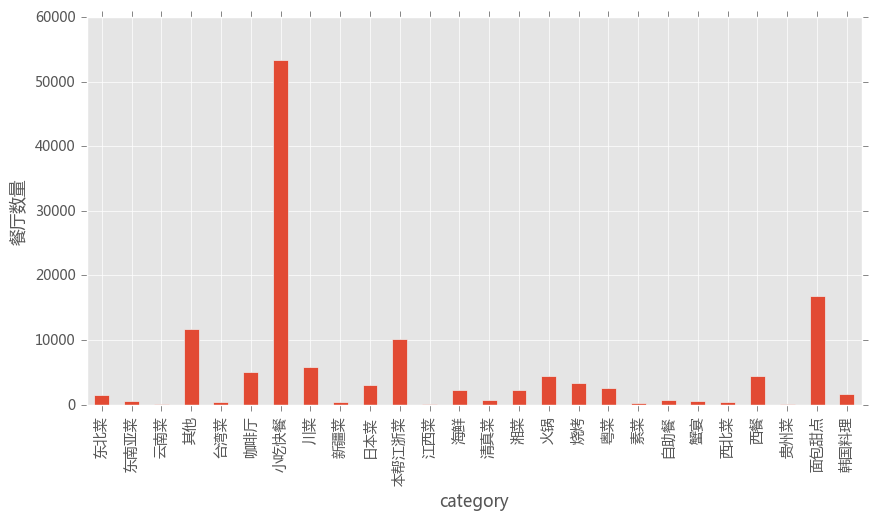

In [48]:
#by_category.to_csv('by_category_shanghai.csv')
#各类餐厅数量分布情况:
(by_category.shop_hot+by_category.shop_cool).plot(kind='bar',figsize=(10,5)).set_ylabel('餐厅数量')

In [ ]:
#小吃快餐餐厅数量接超过50000家,占总量的39%,其次是面包甜点,本帮江浙菜(,其他),均超过10000家.
#而云南菜,江西菜,贵州菜及素菜(不知道这个是什么分类...)餐厅数量较少,在200家以内.

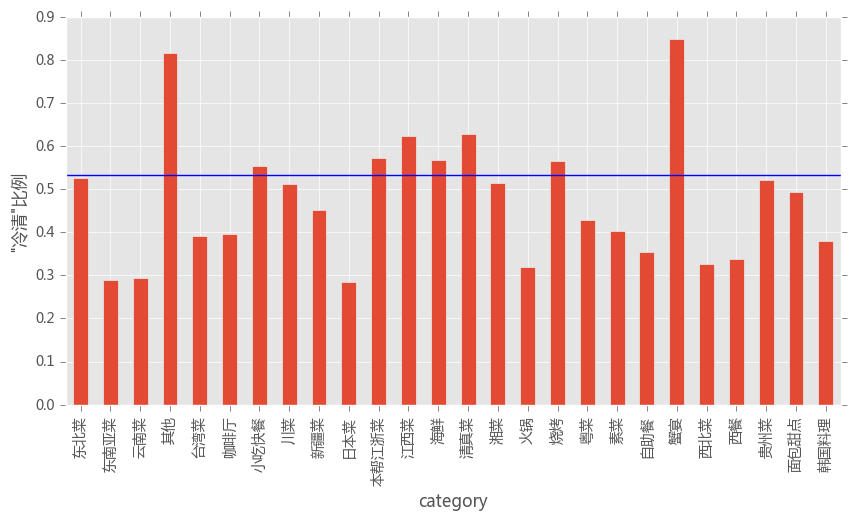

In [52]:
#各类餐厅的"冷清"比例:
by_category.cool_pct.plot.bar(figsize=(10,5)).set_ylabel('"冷清"比例')
plt.axhline(y=by_category.shop_cool.sum()/(by_category.shop_hot.sum()+by_category.shop_cool.sum()))

In [53]:
#可见蟹宴的"冷清"比例最高,达到了85%,其他类的比例也高达82%,其次是江西菜和清真菜,"冷清"比例在62.5%左右.
#而餐厅数量最多的小吃快餐类"冷清"比例只是稍高于平均水平,可见小吃快餐类虽然餐厅数量众多,但是市场需求也较大.
#东南亚菜,云南菜,日本菜,火锅,西北菜及西餐"冷清"比例较低,在30%左右.
#值得关注的是云南菜,餐厅数量很少(116家),"冷清"比例也较低.当然也要注意江西菜,数量很少(141家),但是"冷清"比例较高.

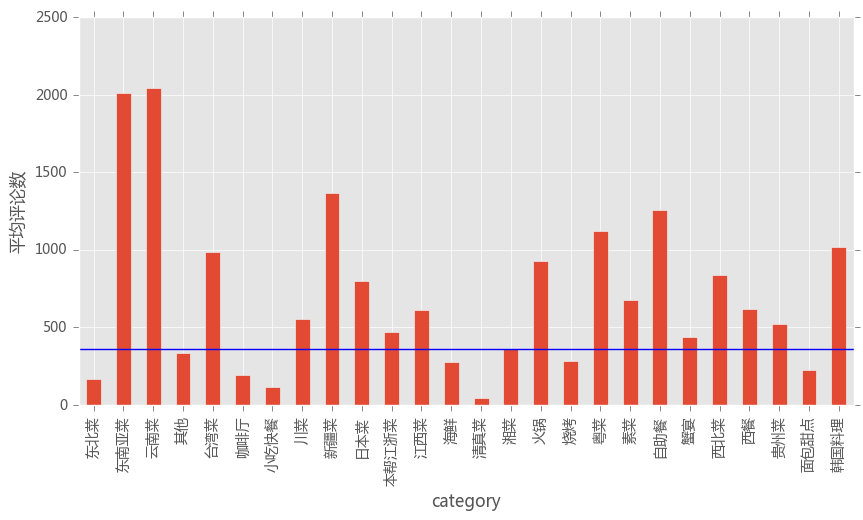

In [55]:
#平均评论数:
by_category.review_num.plot(kind='bar',figsize=(10,5)).set_ylabel('平均评论数')
plt.axhline(y=hot_shops.review_num.mean())

In [ ]:
#云南菜和东南亚菜平均评论数均达到2000,相对于其他分类优势明显.其次是新疆菜,自助餐,韩国料理及粤菜,平均评论数均超过1000.
#清真菜平均评论数远低于平均水平,其次是小吃快餐,在总体平均评论数的1/3,东北菜及咖啡厅均在总体的1/2.

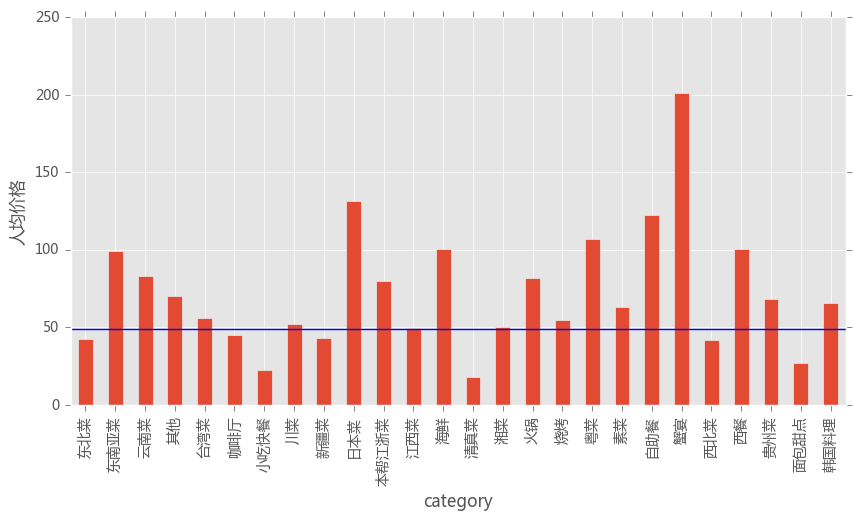

In [56]:
#人均价格:
by_category.mean_price.plot.bar(figsize=(10,5)).set_ylabel('人均价格')
plt.axhline(y=hot_shops.mean_price.mean())

In [ ]:
#蟹宴人均价格最高,达到了200元,为平均水平的4倍左右,其次是日本菜及自助餐,分别为平均价格的2.62和2.44倍.
#清真菜和小吃快餐及面包甜点的人均价格较低,在平均价格一半左右.

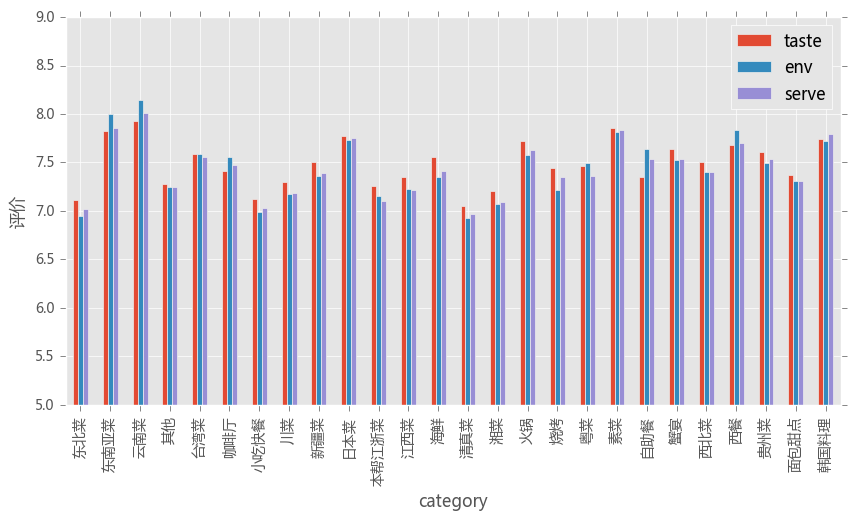

In [58]:
#味道,环境,服务:
by_category[['taste','env','serve']].plot(kind='bar',figsize=(10,5),ylim=[5,9]).set_ylabel('评价')

In [59]:
#总体上看,大部分餐厅得分在7.25-7.75之间,有4类得分偏低,在7.0左右,分别是:东北菜,小吃快餐,清真菜和湘菜,
#而得分较高的为云南菜,东南亚蔡;其次是日本菜,素菜,火锅,西餐和韩国料理.

In [ ]:
#结论:
#清真菜:餐厅数量很少,"冷清"比例较高,平均评论数最低,平均价格最低,平均得分也较低,可见清真菜在上海不受欢迎,新开餐厅需避免.
#蟹宴:餐厅数量不多,"冷清"比例最高(85%),评论数稍高于平均水平,人均价格最高(为平均水平4倍),总体评价普通.可见蟹宴市场空间小,目前已过于饱和,新开餐厅应避免.
#日本菜,火锅,自助餐和西北菜:这4类餐厅"冷清"比例均较低,平均评论数均在总体平均数2倍以上;可见这4类餐厅均还有一定的市场空间,
#日本菜和自助餐有较好的价格空间,而西北菜人均价格最低,评价得分上日本菜和火锅优于自助餐及西北菜.从这4类来看,西北菜稍处于劣势.日本菜最具有优势.
#东南亚菜:餐厅数量较少,"冷清"比例很低(30%),平均评论数远高于总体平均水平,人均价格为平均水平的2倍,评价得分稍逊于云南菜,处于第二名.
#云南菜:餐厅数量很少,"冷清"比例很低(30%),平均评论数远高于总体平均水平,人均价格超过平均水平65%,评价最好.可见东南亚菜和云南菜目前有较大的市场空间,也有较好的价格空间,新开餐厅应强烈推荐

In [60]:
#同样看一下价格和得分之间的关系:
hot_shops[['mean_price','taste','env','serve']].corr()

,mean_price,taste,env,serve
mean_price,1.000000,0.277248,0.327663,0.285060
taste,0.277248,1.000000,0.874009,0.918103
env,0.327663,0.874009,1.000000,0.928651
serve,0.285060,0.918103,0.928651,1.000000


In [62]:
#哎呀,,这个...价格和评价得分之间的相关系数均在0.3左右,可以说不相关了..看来这吃饭,还真的认真挑一挑,好价格不一定能买到好东西..
#当然,味道和环境及服务之间的相关性还是很强的,味道好,环境和服务也相对较好;环境和服务好了,味道自然就上去了...(伺候好消费者是多么重要)

In [89]:
#按地区分组情况:
grouped=hot_shops.groupby('area')['shop','review_num','mean_price','taste','env','serve']
mapping={'shop':'count','review_num':'mean','mean_price':'mean','taste':'mean','env':'mean','serve':'mean'}
by_area_hot=grouped.agg(mapping)
by_area_cool=DataFrame(cool_shops.groupby('area')['shop'].count())

In [90]:
#地区面积(平方公里)和人口(万)
basedata_shanghai=pd.read_csv('papulation_shanghai.csv',index_col=0,skiprows=2)[[0,1]]
basedata_shanghai.columns=['land_area','papulation']
basedata_shanghai.index.name='area'

In [91]:
by_area_merge1=pd.merge(by_area_hot,by_area_cool,how='outer',left_index=True,right_index=True,\
                       suffixes=('_hot','_cool'))
by_area_merge2=pd.merge(by_area_merge1,basedata_shanghai,how='outer',left_index=True,right_index=True)

In [94]:
by_area_merge2['cool_pct']=by_area_merge2.shop_cool/(by_area_merge2.shop_cool+by_area_merge2.shop_hot)
by_area_merge2['density_papulation']=(by_area_merge2.shop_cool+by_area_merge2.shop_hot)/by_area_merge2.papulation
by_area_merge2['density_land']=(by_area_merge2.shop_cool+by_area_merge2.shop_hot)/by_area_merge2.land_area

In [114]:
columns=['shop_hot','review_num','mean_price','taste','env','serve','shop_cool','cool_pct','land_area','papulation','density_land','density_papulation']
by_area=by_area_merge2[columns]

In [115]:
by_area

,shop_hot,review_num,mean_price,taste,env,serve,shop_cool,cool_pct,land_area,papulation,density_land,density_papulation
area,,,,,,,,,,,,
嘉定区,2370,190.872996,43.277637,7.300802,7.256498,7.240759,2647,0.527606,464.20,156.62,10.807841,32.032946
奉贤区,954,72.898323,38.471698,7.216876,7.187736,7.184591,1670,0.636433,687.39,116.76,3.817338,22.473450
宝山区,4265,201.117702,37.386166,7.305909,7.219132,7.236225,5795,0.576044,270.99,202.40,37.123141,49.703557
崇明县,563,47.779751,48.820604,7.198401,7.131972,7.142806,1280,0.694520,1185.49,70.16,1.554631,26.268529
徐汇区,4941,478.525804,54.168589,7.326978,7.242380,7.242704,5089,0.507378,54.76,110.97,183.162893,90.384789
普陀区,3393,348.375774,41.418803,7.269467,7.147421,7.168111,4170,0.551369,54.83,129.61,137.935437,58.351979
杨浦区,3960,401.198737,39.954040,7.321515,7.210404,7.239975,4594,0.537059,60.73,132.37,140.852956,64.621893
松江区,2770,120.381949,38.971480,7.272383,7.232383,7.229242,4080,0.595620,605.64,175.59,11.310349,39.011333
浦东新区,12700,292.940551,45.560315,7.294441,7.232583,7.228087,17779,0.583320,1210.41,545.12,25.180724,55.912460


In [99]:
by_area.to_csv('food_by_area_shanghai.csv')

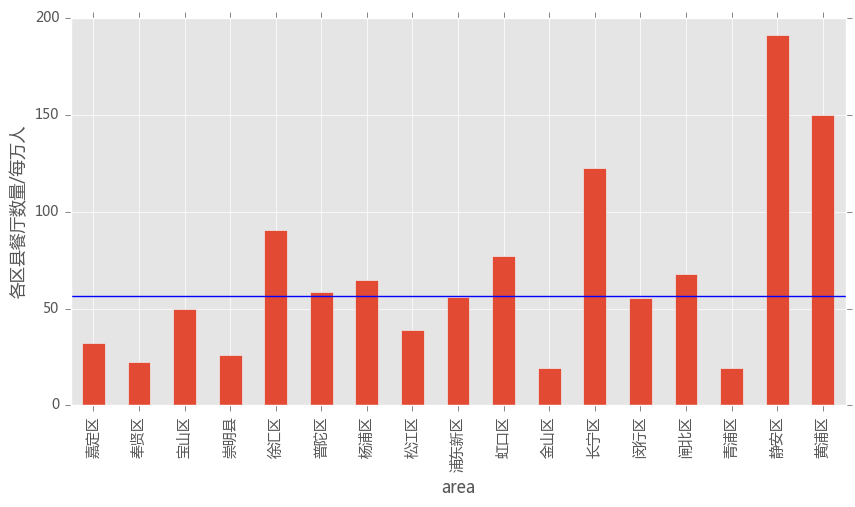

In [101]:
#各区县每万人拥有的餐厅数量:
by_area.density_papulation.plot.bar(figsize=(10,5)).set_ylabel('各区县餐厅数量/每万人')
plt.axhline(y=len(data)/basedata_shanghai.papulation.sum())

In [102]:
#静安区每万人拥有的餐厅数量最多,达到了191家,其次是黄浦区,为150家;长宁区和徐汇区也超出平均水平较多.
#而金山区,青浦区,奉贤区,崇明县每万人拥有的餐厅数量均低于平均水平一半.
#对于一个我这样的刚来上海的人来说,也能明显知道了静安区,黄浦区,长宁区和徐汇区为市中心了.

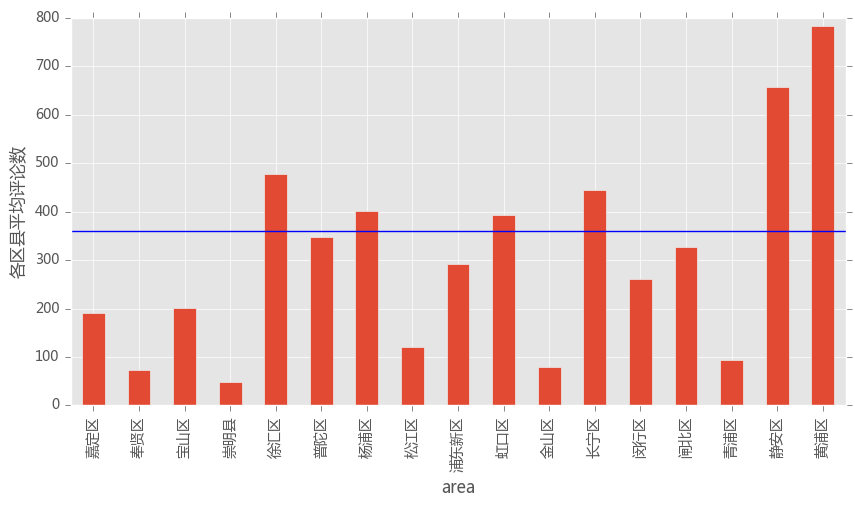

In [103]:
#各区县评论数情况:
by_area.review_num.plot(kind='bar',figsize=(10,5)).set_ylabel('各区县平均评论数')
plt.axhline(y=hot_shops.review_num.sum()/len(hot_shops))

In [104]:
#前四名依然是静安区,黄浦区,长宁区和徐汇区.不过,黄浦区相对静安区有更高的评论数,徐汇区相对与长宁区也有更高的评论数.
#而金山区,青浦区,奉贤区,崇明县依然低于平均水平一半,此外,松江区,宝山区和嘉定区也相对较低.

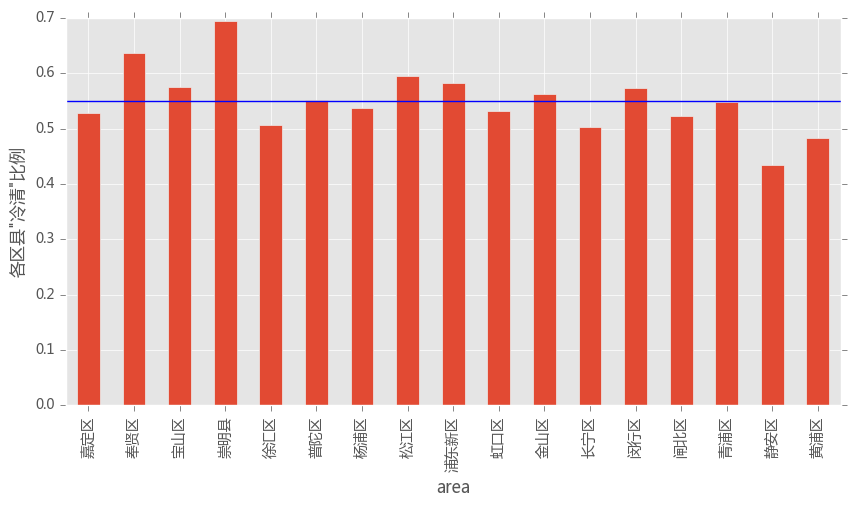

In [105]:
#各区县"冷清"比例:
by_area.cool_pct.plot.bar(figsize=(10,5)).set_ylabel('各区县"冷清"比例')
plt.axhline(y=len(cool_shops)/len(data))

In [106]:
#总体区别不大,在平均水平55%左右. 不过,四个市中区城区有更低的比例,其中又以静安区最为突出.
#崇明县的"冷清"比例最高,其次是奉贤区.

In [107]:
#总结:
#崇明县和奉贤区相对来说"冷清"比例较高,虽然每万人拥有的店铺数量不多,但是平均评论数依然落后.可见这两区市场已过剩.
#而其他各区的情况大致都呈现出这种分布:餐厅分布密度越大,平均评论数就越多,且"冷清"比例也较低.已经发展到与人流量的大小呈现出和谐一致的状态.
#看来想要在上海找出一个最具有优势的地区已经几乎不可能了,那就只能在分类的选择上更加睿智一些啦~

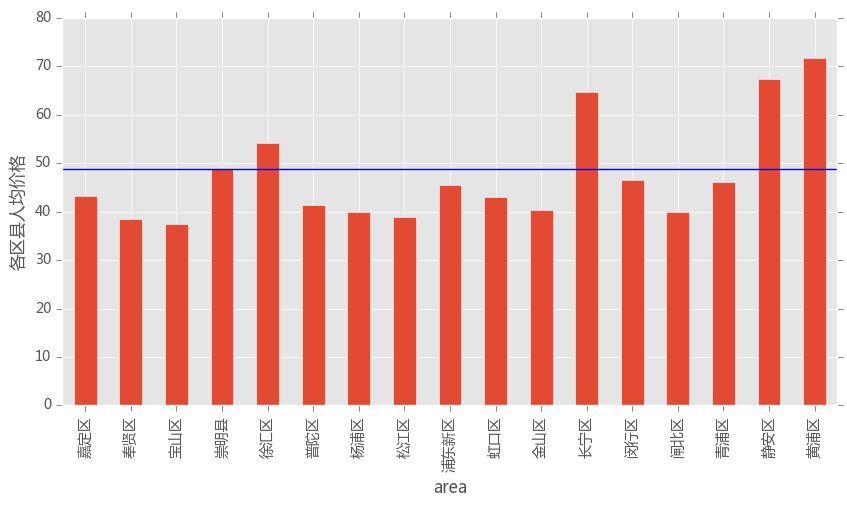

In [108]:
#快速浏览:
#各区县人均价格:
by_area.mean_price.plot.bar(figsize=(10,5)).set_ylabel('各区县人均价格')
plt.axhline(y=hot_shops.mean_price.mean())

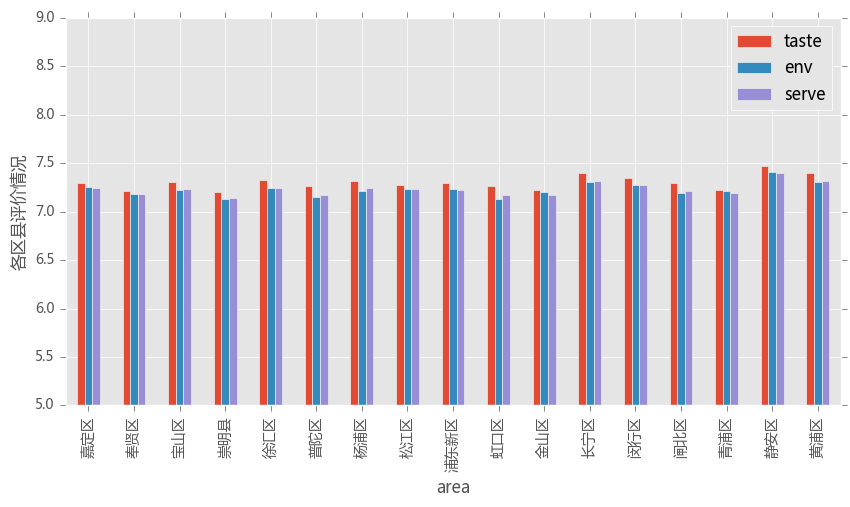

In [110]:
#各区县评价:
by_area[['taste','env','serve']].plot(kind='bar',figsize=(10,5),ylim=[5,9]).set_ylabel('各区县评价情况')